In [628]:
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import textblob
from textblob import TextBlob
import re
import numpy as np
import time
import seaborn as sns
from wordcloud import WordCloud
# nltk
from nltk.stem import WordNetLemmatizer
# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report
import stop_words


nltk.downloader.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [629]:
finviz_url = 'https://finviz.com/quote.ashx?t='
Companies = ['AMZN', 'GOOG', 'FB','TWTR'] # stock companies

news_tables = {} # Declare empty dictionary to store results from finviz

In [630]:
for company in Companies:
    url = finviz_url + company # so it's going to loop first and get the company and url and then page and then comments from people after it will go back and take another company like GOOG
    req = Request(url=url, headers={'user-agent':'my-app'}) # Specify headers or else access will be denied
    response = urlopen(req)
    soup = BeautifulSoup(response,features='html.parser')
    news_table = soup.find(id='news-table')
    news_tables.update({company:news_table})


print(news_tables)


{'AMZN': <table border="0" cellpadding="1" cellspacing="0" class="fullview-news-outer" id="news-table" width="100%">
<tr><td align="right" style="white-space:nowrap" width="130">Aug-08-21 08:10PM  </td><td align="left"><div class="news-link-container"><div class="news-link-left"><a class="tab-link-news" href="https://finance.yahoo.com/news/businesses-bite-the-bullet-hike-pay-to-lure-in-workers-124713615.html" target="_blank">Seeing link between wages and workers, more businesses raise the former to address the latter</a></div><div class="news-link-right"><span style="color:#aa6dc0;font-size:9px"> Yahoo Finance</span></div></div></td></tr>
<tr><td align="right" width="130">10:50AM  </td><td align="left"><div class="news-link-container"><div class="news-link-left"><a class="tab-link-news" href="https://www.fool.com/investing/2021/08/08/amazon-stock-investors-expect-too-much/?source=eptyholnk0000202&amp;utm_source=yahoo-host&amp;utm_medium=feed&amp;utm_campaign=article" target="_blank">Am

In [631]:
parsed_data = []

for company, news_table in news_tables.items(): # this will go through the keys we created above, company and texts
    for row in news_table.find_all('tr'): # the text in in tr, inorder to get all text we need to write find_all if we say find we will get  only tr
        comment = row.a.text
        date_data = row.td.text.split(' ')
        if len(date_data) == 1:
            time = date_data[0]
        else:
            date = date_data[0]
            time = date_data[1]
        parsed_data.append([company,date,time,comment])

        
print(parsed_data)

[['AMZN', 'Aug-08-21', '08:10PM\xa0\xa0', 'Seeing link between wages and workers, more businesses raise the former to address the latter'], ['AMZN', 'Aug-08-21', '10:50AM\xa0\xa0', 'Amazon Stock: Investors Expect Too Much'], ['AMZN', 'Aug-08-21', '07:30AM\xa0\xa0', 'Got $2,000? 3 Explosive Growth Stocks to Buy in August'], ['AMZN', 'Aug-08-21', '07:15AM\xa0\xa0', 'Amazon Investors Are Getting Its E-Commerce Business for Free'], ['AMZN', 'Aug-07-21', '01:07PM\xa0\xa0', 'Amazon Offers $500,000 Cash, Cars, And Vacations To Vaccinated Workers'], ['AMZN', 'Aug-07-21', '09:52AM\xa0\xa0', "Benzinga's Bulls And Bears Of The Week: Amazon, Robinhood, Moderna, Tesla And More"], ['AMZN', 'Aug-07-21', '08:18AM\xa0\xa0', 'Amazon Lottery Offers Vaccinated Workers Cars, $500,000 Cash'], ['AMZN', 'Aug-07-21', '08:00AM\xa0\xa0', '3 Top Reopening Stocks to Buy Right Now'], ['AMZN', 'Aug-07-21', '07:48AM\xa0\xa0', "Corsair Just Reported Earnings. Here's What Shareholders Need to Know"], ['AMZN', 'Aug-07-2

In [632]:

df = pd.DataFrame(parsed_data, columns=['Company','Date','Time','Comments'])
# Analyse your text
vader = SentimentIntensityAnalyzer()

print(df)

    Company       Date       Time  \
0      AMZN  Aug-08-21  08:10PM     
1      AMZN  Aug-08-21  10:50AM     
2      AMZN  Aug-08-21  07:30AM     
3      AMZN  Aug-08-21  07:15AM     
4      AMZN  Aug-07-21  01:07PM     
..      ...        ...        ...   
395    TWTR  Jul-22-21  05:04PM     
396    TWTR  Jul-22-21  05:00PM     
397    TWTR  Jul-22-21  04:38PM     
398    TWTR  Jul-22-21  04:16PM     
399    TWTR  Jul-22-21  04:11PM     

                                              Comments  
0    Seeing link between wages and workers, more bu...  
1              Amazon Stock: Investors Expect Too Much  
2    Got $2,000? 3 Explosive Growth Stocks to Buy i...  
3    Amazon Investors Are Getting Its E-Commerce Bu...  
4    Amazon Offers $500,000 Cash, Cars, And Vacatio...  
..                                                 ...  
395  Twitter Posts Strong Sales, Forecast on Bounce...  
396  Twitter earnings show large, unexpected growth...  
397  Twitters Daily Active User Base Rises

In [664]:
df.columns

Index(['Company', 'Date', 'Time', 'Comments', 'Compound', 'Positive',
       'Negative', 'Neutral'],
      dtype='object')

In [666]:
df.head()

<bound method NDFrame.head of     Company       Date       Time  \
0      AMZN  Aug-08-21  08:10PM     
1      AMZN  Aug-08-21  10:50AM     
2      AMZN  Aug-08-21  07:30AM     
3      AMZN  Aug-08-21  07:15AM     
4      AMZN  Aug-07-21  01:07PM     
..      ...        ...        ...   
395    TWTR  Jul-22-21  05:04PM     
396    TWTR  Jul-22-21  05:00PM     
397    TWTR  Jul-22-21  04:38PM     
398    TWTR  Jul-22-21  04:16PM     
399    TWTR  Jul-22-21  04:11PM     

                                              Comments  Compound  Positive  \
0    seeing link wages workers businesses raise for...    0.0000     0.000   
1                   amazon stock investors expect much    0.1779     0.254   
2               got explosive growth stocks buy august    0.3818     0.245   
3     amazon investors getting ecommerce business free    0.6124     0.417   
4    amazon offers cash cars vacations vaccinated w...    0.1779     0.159   
..                                                 ...   

In [633]:
scores = []
# Declare variables for scores
compound_list = []
positive_list = []
negative_list = []
neutral_list = []
for i in range(df['Comments'].shape[0]):
#print(analyser.polarity_scores(sentiments_pd['text'][i]))
    compound =vader.polarity_scores(df['Comments'][i])["compound"]
    pos = vader.polarity_scores(df['Comments'][i])["pos"]
    neu = vader.polarity_scores(df['Comments'][i])["neu"]
    neg = vader.polarity_scores(df['Comments'][i])["neg"]
    
    scores.append({"Compound": compound,
                       "Positive": pos,
                       "Negative": neg,
                       "Neutral": neu
                  })

In [634]:
print(scores)

[{'Compound': 0.0, 'Positive': 0.0, 'Negative': 0.0, 'Neutral': 1.0}, {'Compound': 0.1779, 'Positive': 0.254, 'Negative': 0.0, 'Neutral': 0.746}, {'Compound': 0.3818, 'Positive': 0.245, 'Negative': 0.0, 'Neutral': 0.755}, {'Compound': 0.6124, 'Positive': 0.417, 'Negative': 0.0, 'Neutral': 0.583}, {'Compound': 0.1779, 'Positive': 0.159, 'Negative': 0.0, 'Neutral': 0.841}, {'Compound': 0.1779, 'Positive': 0.124, 'Negative': 0.0, 'Neutral': 0.876}, {'Compound': 0.1779, 'Positive': 0.195, 'Negative': 0.0, 'Neutral': 0.805}, {'Compound': 0.2023, 'Positive': 0.231, 'Negative': 0.0, 'Neutral': 0.769}, {'Compound': 0.0, 'Positive': 0.0, 'Negative': 0.0, 'Neutral': 1.0}, {'Compound': -0.1027, 'Positive': 0.0, 'Negative': 0.219, 'Neutral': 0.781}, {'Compound': 0.0, 'Positive': 0.0, 'Negative': 0.0, 'Neutral': 1.0}, {'Compound': 0.0, 'Positive': 0.0, 'Negative': 0.0, 'Neutral': 1.0}, {'Compound': 0.0, 'Positive': 0.0, 'Negative': 0.0, 'Neutral': 1.0}, {'Compound': 0.5859, 'Positive': 0.432, 'Nega

In [635]:
sentiments_score = pd.DataFrame.from_dict(scores)
df = df.join(sentiments_score)
df.head()

,Company,Date,Time,Comments,Compound,Positive,Negative,Neutral
0,AMZN,Aug-08-21,08:10PM,"Seeing link between wages and workers, more bu...",0.0000,0.000,0.0,1.000
1,AMZN,Aug-08-21,10:50AM,Amazon Stock: Investors Expect Too Much,0.1779,0.254,0.0,0.746
2,AMZN,Aug-08-21,07:30AM,"Got $2,000? 3 Explosive Growth Stocks to Buy i...",0.3818,0.245,0.0,0.755
3,AMZN,Aug-08-21,07:15AM,Amazon Investors Are Getting Its E-Commerce Bu...,0.6124,0.417,0.0,0.583
4,AMZN,Aug-07-21,01:07PM,"Amazon Offers $500,000 Cash, Cars, And Vacatio...",0.1779,0.159,0.0,0.841


In [636]:
df

,Company,Date,Time,Comments,Compound,Positive,Negative,Neutral
0,AMZN,Aug-08-21,08:10PM,"Seeing link between wages and workers, more bu...",0.0000,0.000,0.0,1.000
1,AMZN,Aug-08-21,10:50AM,Amazon Stock: Investors Expect Too Much,0.1779,0.254,0.0,0.746
2,AMZN,Aug-08-21,07:30AM,"Got $2,000? 3 Explosive Growth Stocks to Buy i...",0.3818,0.245,0.0,0.755
3,AMZN,Aug-08-21,07:15AM,Amazon Investors Are Getting Its E-Commerce Bu...,0.6124,0.417,0.0,0.583
4,AMZN,Aug-07-21,01:07PM,"Amazon Offers $500,000 Cash, Cars, And Vacatio...",0.1779,0.159,0.0,0.841
...,...,...,...,...,...,...,...,...
395,TWTR,Jul-22-21,05:04PM,"Twitter Posts Strong Sales, Forecast on Bounce...",0.5106,0.268,0.0,0.732
396,TWTR,Jul-22-21,05:00PM,"Twitter earnings show large, unexpected growth...",0.3818,0.206,0.0,0.794
397,TWTR,Jul-22-21,04:38PM,Twitters Daily Active User Base Rises 11% In Q...,0.7184,0.316,0.0,0.684
398,TWTR,Jul-22-21,04:16PM,Twitter Hits 206 Million Daily Users in Q2 Ami...,0.0000,0.000,0.0,1.000


In [637]:
#Collect the compound values for each news source
score_table = df.pivot_table(index='Company',  values="Neutral", aggfunc = np.mean)
score_table

,Neutral
Company,
AMZN,0.79634
FB,0.83531
GOOG,0.84257
TWTR,0.86157


<AxesSubplot:xlabel='Company'>

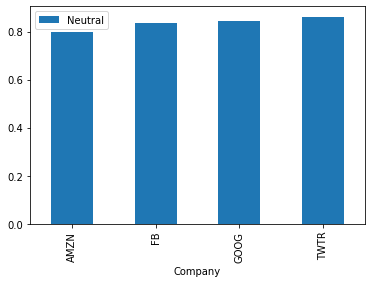

In [638]:
score_table.plot(kind='bar')

In [639]:
#Collect the compound values for each news source
score_table = df.pivot_table(index='Company',  values="Compound", aggfunc = np.mean)
score_table

,Compound
Company,
AMZN,0.152195
FB,0.003776
GOOG,0.110344
TWTR,-0.004423


<AxesSubplot:xlabel='Company'>

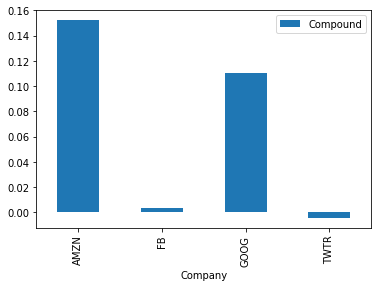

In [640]:
#plotting 
score_table.plot(kind='bar')

In [641]:
#Collect the negative values for each news source
neg_score_table = df.pivot_table(index='Company',  values="Negative", aggfunc = np.mean)
neg_score_table

,Negative
Company,
AMZN,0.04905
FB,0.07852
GOOG,0.04680
TWTR,0.07117


<AxesSubplot:xlabel='Company'>

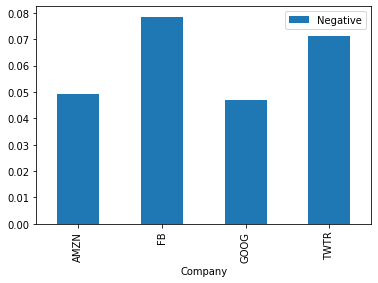

In [642]:
#plotting 
neg_score_table.plot(kind='bar')

In [643]:
df.Comments.str.split(expand=True).stack().value_counts()

to              118
the              64
Stocks           60
in               48
Stock            41
               ... 
Beyond)           1
Mind-Reading      1
Richer            1
Disables          1
academics         1
Length: 1655, dtype: int64

In [644]:
df['Comments']=df['Comments'].str.lower()
df.tail()

,Company,Date,Time,Comments,Compound,Positive,Negative,Neutral
395,TWTR,Jul-22-21,05:04PM,"twitter posts strong sales, forecast on bounce...",0.5106,0.268,0.0,0.732
396,TWTR,Jul-22-21,05:00PM,"twitter earnings show large, unexpected growth...",0.3818,0.206,0.0,0.794
397,TWTR,Jul-22-21,04:38PM,twitters daily active user base rises 11% in q...,0.7184,0.316,0.0,0.684
398,TWTR,Jul-22-21,04:16PM,twitter hits 206 million daily users in q2 ami...,0.0000,0.000,0.0,1.000
399,TWTR,Jul-22-21,04:11PM,twitter beats revenue targets with ad improvem...,0.5423,0.360,0.0,0.640


In [645]:
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

In [646]:
STOPWORDS = set(stopwordlist)
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
df['Comments'] = df['Comments'].apply(lambda text: cleaning_stopwords(text))
df['Comments'].head()

0    seeing link wages workers, businesses raise fo...
1                  amazon stock: investors expect much
2     got $2,000? 3 explosive growth stocks buy august
3    amazon investors getting e-commerce business free
4    amazon offers $500,000 cash, cars, vacations v...
Name: Comments, dtype: object

In [647]:
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(Comments):
    translator = str.maketrans('', '', punctuations_list)
    return Comments.translate(translator)
df['Comments']= df['Comments'].apply(lambda x: cleaning_punctuations(x))
df['Comments'].tail()

395    twitter posts strong sales forecast bounce bac...
396    twitter earnings show large unexpected growth ...
397    twitters daily active user base rises 11 q2 so...
398    twitter hits 206 million daily users q2 amid d...
399    twitter beats revenue targets ad improvements ...
Name: Comments, dtype: object

In [648]:
def cleaning_repeating_char(Comments):
    return re.sub(r'(.)1+', r'1', Comments)
df['Comments'] = df['Comments'].apply(lambda x: cleaning_repeating_char(x))
df['Comments'].tail()

395    twitter posts strong sales forecast bounce bac...
396    twitter earnings show large unexpected growth ...
397    twitters daily active user base rises1 q2 soci...
398    twitter hits 206 million daily users q2 amid d...
399    twitter beats revenue targets ad improvements ...
Name: Comments, dtype: object

In [649]:
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
df['Comments'] = df['Comments'].apply(lambda x: cleaning_numbers(x))
df['Comments'].tail()

395    twitter posts strong sales forecast bounce bac...
396    twitter earnings show large unexpected growth ...
397    twitters daily active user base rises q social...
398    twitter hits  million daily users q amid decli...
399    twitter beats revenue targets ad improvements ...
Name: Comments, dtype: object

In [650]:
from nltk.tokenize import RegexpTokenizer


tokenizer = RegexpTokenizer(r'\w+')
df['Comments'] = df['Comments'].apply(tokenizer.tokenize)
df['Comments'].head()


0    [seeing, link, wages, workers, businesses, rai...
1             [amazon, stock, investors, expect, much]
2        [got, explosive, growth, stocks, buy, august]
3    [amazon, investors, getting, ecommerce, busine...
4    [amazon, offers, cash, cars, vacations, vaccin...
Name: Comments, dtype: object

In [651]:
import nltk
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data
df['Comments']= df['Comments'].apply(lambda x: stemming_on_text(x))
df['Comments'].head()

0    [seeing, link, wages, workers, businesses, rai...
1             [amazon, stock, investors, expect, much]
2        [got, explosive, growth, stocks, buy, august]
3    [amazon, investors, getting, ecommerce, busine...
4    [amazon, offers, cash, cars, vacations, vaccin...
Name: Comments, dtype: object

In [652]:
lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return data
df['Comments'] = df['Comments'].apply(lambda x: lemmatizer_on_text(x))
df['Comments'].head()


0    [seeing, link, wages, workers, businesses, rai...
1             [amazon, stock, investors, expect, much]
2        [got, explosive, growth, stocks, buy, august]
3    [amazon, investors, getting, ecommerce, busine...
4    [amazon, offers, cash, cars, vacations, vaccin...
Name: Comments, dtype: object

In [653]:
 
df['Comments'] = pd.Series([' '.join(map(str, x)) for x in df['Comments']])
df['Comments']

0      seeing link wages workers businesses raise for...
1                     amazon stock investors expect much
2                 got explosive growth stocks buy august
3       amazon investors getting ecommerce business free
4      amazon offers cash cars vacations vaccinated w...
                             ...                        
395    twitter posts strong sales forecast bounce bac...
396    twitter earnings show large unexpected growth ...
397    twitters daily active user base rises q social...
398    twitter hits million daily users q amid declin...
399    twitter beats revenue targets ad improvements ...
Name: Comments, Length: 400, dtype: object

In [654]:
X= df.Comments
y= df.Compound

In [655]:
##data_neg = 
#plt.figure(figsize = (20,20))
#wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               #collocations=False).generate(" ".join(data_neg))
#plt.imshow(wc)

In [656]:
# Separating the 95% data for training data and 5% for testing data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.05, random_state =26105111)

In [657]:
X_train

72     etsy reported solid earnings stock taking nose...
316    twitter partners ap reuters battle misinformat...
341    twitter shuts offices san francisco new york a...
346    activision blizzard employees strike fans call...
370        advertisers start flock snap analyst predicts
                             ...                        
215    best stocks buy according billionaire daniel s...
204    stock market crashes common stocks buy one hap...
321    square deal vaults afterpay founders billion f...
174         legality behind mandating vaccines customers
244    instacart names former facebook global ads chi...
Name: Comments, Length: 380, dtype: object

In [658]:
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=1180)
vectoriser.fit(df)
print('No. of feature_words: ', len(vectoriser.get_feature_names()))

No. of feature_words:  8


In [659]:

vectoriser = TfidfVectorizer()
x = vectoriser.fit_transform(df)
print(vectoriser.get_feature_names())
print(x.shape)


['comments', 'company', 'compound', 'date', 'negative', 'neutral', 'positive', 'time']
(8, 8)


In [660]:
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)
print(X_test)

  (11, 1)	1.0


In [661]:
def model_Evaluate(model):  # Predict values for Test dataset
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))



Text(0.5, 1.0, 'Confusion Matrix')

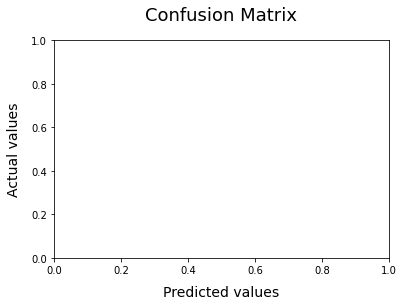

In [662]:
def model_Evaluate(model):  # Predict values for Test dataset
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))  # Print the evaluation metrics for the dataset.
    cf_matrix = confusion_matrix(y_test, y_pred)  # Compute and plot the Confusion matrix
    categories = ['Compound','Comments']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
    labels = [f'{v1}n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
xticklabels = categories, yticklabels = categories)
plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

In [663]:
BNBmodel = BernoulliNB()
BNBmodel.fit(X_train, y_train)
model_Evaluate(BNBmodel)
y_pred1 = BNBmodel.predict(X_test)

ValueError: Unknown label type: (array([ 0.1531, -0.5994,  0.    , -0.4215,  0.    ,  0.    ,  0.    ,
        0.4215, -0.3071,  0.    ,  0.    ,  0.6369,  0.    ,  0.7184,
        0.6369,  0.2023,  0.    ,  0.5423,  0.2023, -0.3818,  0.    ,
       -0.34  ,  0.5859,  0.34  , -0.4215,  0.4939,  0.    ,  0.1531,
       -0.5267, -0.0772,  0.    ,  0.1779,  0.4019,  0.7184,  0.    ,
        0.    ,  0.    ,  0.    ,  0.    ,  0.34  ,  0.6908,  0.    ,
        0.6124, -0.7964, -0.6908,  0.    , -0.1779,  0.    ,  0.    ,
       -0.3612,  0.    ,  0.    , -0.25  , -0.4404,  0.    ,  0.2023,
        0.    ,  0.    , -0.4404,  0.34  ,  0.34  ,  0.296 ,  0.8519,
        0.5994,  0.    , -0.6705,  0.    ,  0.    ,  0.6249,  0.    ,
       -0.1526,  0.    , -0.3182,  0.6369,  0.5106,  0.    ,  0.296 ,
        0.    ,  0.    ,  0.6124,  0.3818,  0.2732,  0.1779,  0.3612,
        0.1779, -0.1779,  0.    ,  0.2023,  0.1779,  0.6124, -0.3182,
        0.4939,  0.128 ,  0.5106,  0.    ,  0.    ,  0.4019,  0.    ,
        0.1779, -0.1779,  0.    , -0.5267,  0.2732,  0.1779, -0.5994,
        0.    ,  0.    , -0.4767, -0.2584,  0.    ,  0.    ,  0.3818,
        0.    , -0.4019,  0.    ,  0.    , -0.1935,  0.    ,  0.    ,
        0.    , -0.6377,  0.    ,  0.2944,  0.6369,  0.    ,  0.    ,
        0.    ,  0.1779,  0.    ,  0.4019,  0.    ,  0.5423, -0.0772,
        0.    ,  0.    , -0.4019,  0.6597,  0.2263,  0.    , -0.25  ,
        0.    ,  0.5413,  0.    ,  0.6808,  0.5859,  0.    ,  0.    ,
        0.4019,  0.    ,  0.    ,  0.25  ,  0.    ,  0.    , -0.25  ,
        0.4404,  0.5423,  0.5256,  0.    , -0.4717,  0.5994,  0.    ,
        0.    ,  0.    ,  0.6369, -0.6808,  0.    ,  0.    ,  0.    ,
       -0.34  ,  0.2263,  0.    ,  0.    ,  0.6369,  0.    ,  0.8126,
       -0.128 ,  0.4215,  0.    ,  0.1779,  0.    , -0.5994,  0.5859,
        0.357 ,  0.34  ,  0.    , -0.7964,  0.7351,  0.    , -0.25  ,
        0.2732,  0.1027,  0.    ,  0.    ,  0.5413,  0.2755,  0.4215,
        0.    ,  0.    ,  0.    ,  0.2023,  0.2023, -0.7964,  0.128 ,
       -0.4215,  0.    , -0.3818, -0.2732, -0.6249,  0.    ,  0.    ,
       -0.2023,  0.    , -0.25  ,  0.    ,  0.5574,  0.    ,  0.1779,
        0.    ,  0.25  ,  0.6369, -0.3182,  0.6124,  0.6249,  0.4019,
        0.    ,  0.7184, -0.4215,  0.    ,  0.    ,  0.1027,  0.    ,
        0.    ,  0.3818,  0.3612,  0.6486,  0.    ,  0.6369,  0.    ,
        0.    , -0.3071,  0.1779,  0.2023, -0.0258, -0.3071, -0.3875,
        0.    ,  0.    ,  0.    ,  0.5859, -0.1027,  0.0258,  0.    ,
        0.4215,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.7003,
        0.6652,  0.    ,  0.    ,  0.3875,  0.5994,  0.2023,  0.1779,
        0.5994,  0.    ,  0.    ,  0.5994,  0.6369,  0.    , -0.4767,
       -0.5267,  0.    , -0.0772,  0.6124,  0.1779,  0.    ,  0.    ,
       -0.3724,  0.    , -0.1027,  0.2023,  0.5423,  0.4019, -0.6705,
        0.296 ,  0.    ,  0.    , -0.7964,  0.    ,  0.    ,  0.    ,
       -0.5994,  0.    ,  0.0258,  0.    ,  0.5994,  0.    , -0.3875,
        0.4019,  0.4215,  0.    , -0.5574, -0.7003, -0.7964,  0.    ,
        0.3818,  0.    ,  0.    ,  0.2023,  0.    ,  0.    ,  0.    ,
        0.6369,  0.1779,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
        0.    ,  0.5106, -0.6705,  0.    ,  0.    ,  0.    ,  0.6369,
        0.5423,  0.    ,  0.1779,  0.    , -0.2732,  0.    ,  0.    ,
        0.4215,  0.    , -0.296 ,  0.4215, -0.8204,  0.4215,  0.    ,
        0.6124,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.4215,
        0.    , -0.5423,  0.1779,  0.    ,  0.2023,  0.5994,  0.7579,
        0.    ,  0.    , -0.1935, -0.4168,  0.    ,  0.1779,  0.6369,
        0.1779,  0.    ,  0.    , -0.3182,  0.    , -0.6705,  0.7713,
       -0.0258, -0.5859, -0.296 ,  0.    ,  0.6369,  0.    ,  0.    ,
        0.    ,  0.    ]),)

In [ ]:
print('total words from movie review corpus: ', len(df['Comments'].value_counts()))

# load all the words in freq distribution
all_words = nltk.FreqDist(w.lower() for w in df['Comments'].value_counts())

#construct a list of the 2000 most frequent words in the overall corpus (you can try with other numbers as well)
most_freq_words = all_words.most_common(2000)
print('most freq words: ', most_freq_words[100:110])

word_features = [word for (word, count) in most_freq_words]
print('word_features[:25]: ', word_features[:25])

In [ ]:
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)
    return hashtags


HT_positive = hashtag_extract(df['Comments'][df['Compound'] > 0.5])
HT_positive

In [ ]:
HT_positive = []
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)
    return hashtags
# extracting hashtags from positive tweetsHT_positive = hashtag_extract(df_tws['text'][df_tws['sent'] == 1])
# extracting hashtags from  tweets
HT_positive = hashtag_extract(df['Comments'][df['Compound'] > 0.5])
# unnesting list
HT_positive = sum(HT_positive,[])
HT_positive

In [ ]:
function = lambda x: vader.polarity_scores(x)['compound']
# We want to loop through our comments column
df['Compound'] = df['Comments'].apply(function) #The compound score is the sum of positive, negative & neutral scores which is then normalized between -1(most extreme negative) and +1 (most extreme positive). The more Compound score closer to +1, the higher the positivity of the text. Above text is 49.2% Positive, 0% Negative, 50.8% Neutral
# Convert date column to date time
df['Date'] = pd.to_datetime(df.Date).dt.date



# print(vader.polarity_scores('I hate eating cheese'))
print(df)

In [ ]:
plt.figure(figsize=(6,8))
# Using groupby makes us to have one date entry
mean_df = df.groupby(['Company','Date']).mean()
#print(mean_df)

# Allow us to have date as x-axis
mean_df = mean_df.unstack()
# Remove compound column
mean_df = mean_df.xs('Compound', axis='columns').transpose()
mean_df.plot(kind='bar')
plt.show()
#print(mean_df)